In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import folium.plugins as plugins

In [2]:
full_fires_df = pd.read_csv('/Users/kaciewebster/Documents/dsi/ca-fire-incidents/California_Fire_Incidents.csv')
full_fires_df.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [5]:
full_fires_df.shape

(1636, 40)

In [6]:
full_fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1633 non-null   float64
 1   Active                1636 non-null   bool   
 2   AdminUnit             1636 non-null   object 
 3   AirTankers            28 non-null     float64
 4   ArchiveYear           1636 non-null   int64  
 5   CalFireIncident       1636 non-null   bool   
 6   CanonicalUrl          1636 non-null   object 
 7   ConditionStatement    284 non-null    object 
 8   ControlStatement      111 non-null    object 
 9   Counties              1636 non-null   object 
 10  CountyIds             1636 non-null   object 
 11  CrewsInvolved         171 non-null    float64
 12  Dozers                123 non-null    float64
 13  Engines               191 non-null    float64
 14  Extinguished          1577 non-null   object 
 15  Fatalities           

In [7]:
full_fires_df['Started'].apply(lambda x: int(x[:4])).value_counts()
# 2 observations from 1969, so drop them.

2017    437
2018    315
2019    266
2016    185
2013    162
2015    152
2014    117
1969      2
Name: Started, dtype: int64

In [8]:
full_fires_df['StartYear'] = full_fires_df['Started'].apply(lambda x: int(x[:4]))
full_fires_df['StartYear']

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
1631    2019
1632    2019
1633    2019
1634    2019
1635    2019
Name: StartYear, Length: 1636, dtype: int64

In [9]:
full_fires_df['Started'].apply(lambda x: int(x[5:7])).value_counts()

7     415
6     319
8     282
9     208
10    147
5     140
11     42
4      35
12     21
1      11
2      10
3       6
Name: Started, dtype: int64

In [10]:
full_fires_df['StartMonth'] = full_fires_df['Started'].apply(lambda x: int(x[5:7]))
full_fires_df['StartMonth']

0        8
1        5
2        7
3        8
4        5
        ..
1631    10
1632     6
1633    11
1634    10
1635    10
Name: StartMonth, Length: 1636, dtype: int64

In [104]:
ca_fires_df = full_fires_df[['UniqueId', 'Name', 'Counties', 'StartYear', 'StartMonth', 'AcresBurned', 'Latitude', 'Longitude']]
ca_fires_df.shape
# created dataframe with columns: Name, Counties, StartYear, StartMonth, AcresBurned, Latitude, Longitude.

(1636, 8)

In [105]:
ca_fires_df = ca_fires_df.dropna(axis=0, subset=['AcresBurned'])
ca_fires_df.shape
# removed null values from AcresBurned column.

(1633, 8)

In [106]:
ca_fires_df = ca_fires_df[(ca_fires_df['Latitude'] >= 32) & (ca_fires_df['Latitude'] <= 42) & (ca_fires_df['Longitude'] <= -114) & (ca_fires_df['Longitude'] >= -126)]
ca_fires_df.shape
# removed observations that were not in CA.

(1462, 8)

In [107]:
ca_fires_df = ca_fires_df[ca_fires_df['StartYear'] >= 2013]
ca_fires_df.shape
# removed observations that are not in the range 2013-2019.

(1460, 8)

In [108]:
ca_fires_df[(ca_fires_df['Latitude'] >= 38) & (ca_fires_df['Latitude'] <= 41) & (ca_fires_df['Longitude'] <= -115) & (ca_fires_df['Longitude'] >= -118)]
ca_fires_df[ca_fires_df['Counties'] == 'State of Nevada']
# how I found out which fires were from Nevada.

,UniqueId,Name,Counties,StartYear,StartMonth,AcresBurned,Latitude,Longitude
1424,3086ac2b-bbb3-4321-81e3-3cfdb9e571e9,Jasper Fire,State of Nevada,2019,7,1165.0,39.631945,-119.769881


In [109]:
ca_fires_df = ca_fires_df[ca_fires_df['Counties'] != 'State of Nevada']
ca_fires_df = ca_fires_df[ca_fires_df['Name'] != 'Tram Fire']
ca_fires_df.shape
# removed observations that are in Nevada.
# one that had a county name, 'State of Nevada', and one that had coordinates outside of CA.

(1458, 8)

In [110]:
ca_fires_df.head()

,UniqueId,Name,Counties,StartYear,StartMonth,AcresBurned,Latitude,Longitude
0,5fb18d4d-213f-4d83-a179-daaf11939e78,Rim Fire,Tuolumne,2013,8,257314.0,37.857000,-120.086000
1,bf37805e-1cc2-4208-9972-753e47874c87,Powerhouse Fire,Los Angeles,2013,5,30274.0,34.585595,-118.423176
2,a3149fec-4d48-427c-8b2c-59e8b79d59db,Mountain Fire,Riverside,2013,7,27531.0,33.709500,-116.728850
3,8213f5c7-34fa-403b-a4bc-da2ace6e6625,American Fire,Placer,2013,8,27440.0,39.120000,-120.650000
5,bee8c339-4f26-4b78-a5b4-a8a0ebdb8786,Aspen Fire,Fresno,2013,7,22992.0,37.279000,-119.318000


In [111]:
ca_fires_df.describe()

,StartYear,StartMonth,AcresBurned,Latitude,Longitude
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,2016.792867,7.396433,4705.664609,37.257266,-120.307460
std,1.804335,1.757201,28579.715193,2.553023,2.006310
min,2013.000000,1.000000,0.000000,32.557546,-124.196290
25%,2016.000000,6.000000,35.000000,34.965330,-121.870888
50%,2017.000000,7.000000,98.500000,37.459045,-120.723180
75%,2018.000000,9.000000,419.000000,39.246780,-118.768455
max,2019.000000,12.000000,410203.000000,41.999341,-114.572650


In [112]:
ca_fires_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1632
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UniqueId     1458 non-null   object 
 1   Name         1458 non-null   object 
 2   Counties     1458 non-null   object 
 3   StartYear    1458 non-null   int64  
 4   StartMonth   1458 non-null   int64  
 5   AcresBurned  1458 non-null   float64
 6   Latitude     1458 non-null   float64
 7   Longitude    1458 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 102.5+ KB


In [124]:
ca_fires_df['UniqueId'].nunique()

1433

In [120]:
ca_fires_df[ca_fires_df['Name']=='Ranch Fire (Mendocino Complex)']
# UniqueId is the same for observations about the same fire.

,UniqueId,Name,Counties,StartYear,StartMonth,AcresBurned,Latitude,Longitude
1054,90b0daf7-5d84-42d9-bb35-bb78d4faf950,Ranch Fire (Mendocino Complex),Colusa,2018,7,410203.0,39.243283,-123.103367
1055,90b0daf7-5d84-42d9-bb35-bb78d4faf950,Ranch Fire (Mendocino Complex),Glenn,2018,7,410203.0,39.243283,-123.103367
1056,90b0daf7-5d84-42d9-bb35-bb78d4faf950,Ranch Fire (Mendocino Complex),Lake,2018,7,410203.0,39.243283,-123.103367
1057,90b0daf7-5d84-42d9-bb35-bb78d4faf950,Ranch Fire (Mendocino Complex),Mendocino,2018,7,410203.0,39.243283,-123.103367


In [123]:
ca_fires_df = ca_fires_df.groupby('UniqueId').max().reset_index()
ca_fires_df.shape

(1433, 8)

In [133]:
ca_fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UniqueId     1433 non-null   object 
 1   Name         1433 non-null   object 
 2   Counties     1433 non-null   object 
 3   StartYear    1433 non-null   int64  
 4   StartMonth   1433 non-null   int64  
 5   AcresBurned  1433 non-null   float64
 6   Latitude     1433 non-null   float64
 7   Longitude    1433 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 89.7+ KB


In [132]:
ca_fires_df.head()

,UniqueId,Name,Counties,StartYear,StartMonth,AcresBurned,Latitude,Longitude
0,00089805-cdee-4607-8b67-1653bee463bc,Gulch Fire,Modoc,2014,7,1469.0,41.489000,-120.904000
1,0089d3c4-c554-46e1-8eb9-af95e4dfae0c,Toro Fire,Riverside,2019,8,94.0,33.740219,-117.333728
2,00a13d84-415e-4106-aa31-2e664ed9eabf,Sky Fire,Shasta,2017,7,17.0,40.692590,-122.173840
3,00e6d6d5-f168-45fa-817a-f7758a5170b7,Easy Fire,Ventura,2019,10,1806.0,34.282179,-118.803389
4,01018620-8f10-4de0-a7e6-78cc9a77cc9a,Curie Fire,Santa Clara,2018,7,70.0,37.225450,-121.791890


In [125]:
m = folium.Map(location=[34.0522, -118.2437], zoom_start=5)

fire_arr = np.array(ca_fires_df[['Latitude', 'Longitude']])

m.add_child(plugins.HeatMap(fire_arr, radius=17))
m

In [127]:
df_copy = ca_fires_df.copy()
df_years_list = []
for year in df_copy['StartYear'].sort_values().unique():
    df_years_list.append(df_copy.loc[df_copy['StartYear']==year, ['Latitude', 'Longitude']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist())
# creates a list of lists where each element is a year and each element in that list element contains the latitudes and longitudes of each fire
    
m = folium.Map(location=[34.0522, -118.2437], zoom_start=5)
plugins.HeatMapWithTime(df_years_list, radius=5, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(m)
m

In [128]:
ca_fires_df['Counties'].value_counts().sort_values(ascending=False).head(1)

Riverside    127
Name: Counties, dtype: int64

Riverside has had the most fires.
When split up by year, Riverside still had the most (4/7 times).

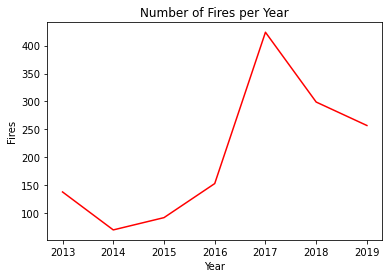

In [137]:
num_fires = ca_fires_df.groupby('StartYear')['AcresBurned'].count()
years = sorted(ca_fires_df['StartYear'].unique())

fig, ax = plt.subplots()
ax.plot(years, num_fires, color='red')
ax.set_title('Number of Fires per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Fires')

plt.show()

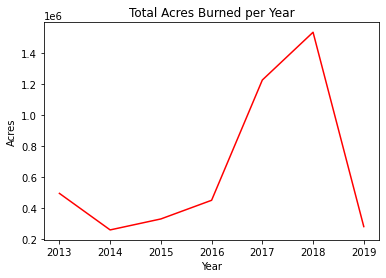

In [151]:
sum_acres = ca_fires_df.groupby('StartYear')['AcresBurned'].sum()
years = sorted(ca_fires_df['StartYear'].unique())

fig, ax = plt.subplots()
ax.plot(years, sum_acres, color='red')
ax.set_title('Total Acres Burned per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Acres')

plt.show()

In [139]:
ca_fires_df[(ca_fires_df['StartYear'] == 2018) & (ca_fires_df['AcresBurned'] == 410203.0)]
# Ranch Fire was really bad and stretched over multiple counties.

,UniqueId,Name,Counties,StartYear,StartMonth,AcresBurned,Latitude,Longitude
795,90b0daf7-5d84-42d9-bb35-bb78d4faf950,Ranch Fire (Mendocino Complex),Mendocino,2018,7,410203.0,39.243283,-123.103367


In [145]:
ca_fires_df[ca_fires_df['Name'] == 'Camp Fire']

,UniqueId,Name,Counties,StartYear,StartMonth,AcresBurned,Latitude,Longitude
7,0194a44a-0c12-4e47-a053-f3b9b2382858,Camp Fire,San Luis Obispo,2018,7,14.0,35.70086,-120.97339
19,048c085b-3162-4906-beef-7aa2ba1b868d,Camp Fire,San Luis Obispo,2017,5,225.0,35.34541,-120.76464
645,75dafe80-f18a-4a4a-9a37-4b564c5f6014,Camp Fire,Butte,2018,11,153336.0,39.81340,-121.43470


2017 had the most fires, but 2018 had the most acres burned. Which one is considered worse?

In [140]:
def month_counter(year):
    '''
    Creates a dictionary containing the counts for each month in a particular year for ca_fires_df.
    Parameters: integer year
    Returns: dictionary
    '''
    
    months_dct = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}
    
    for month in ca_fires_df[ca_fires_df['StartYear']==year]['StartMonth']:
        if month in months_dct:
            months_dct[month] += 1
            
    return months_dct

In [141]:
def apply_month_counter(year_lst):
    '''
    Applies the previous month_counter() to a list of years.
    Parameters: list of integer years
    Returns: list of dictionaries where each dictionary represents the distribution of months per year
    '''
    
    dct_lst = [month_counter(year) for year in year_lst]
    
    return dct_lst

In [142]:
year_lst = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
fires_dct_lst = apply_month_counter(year_lst)

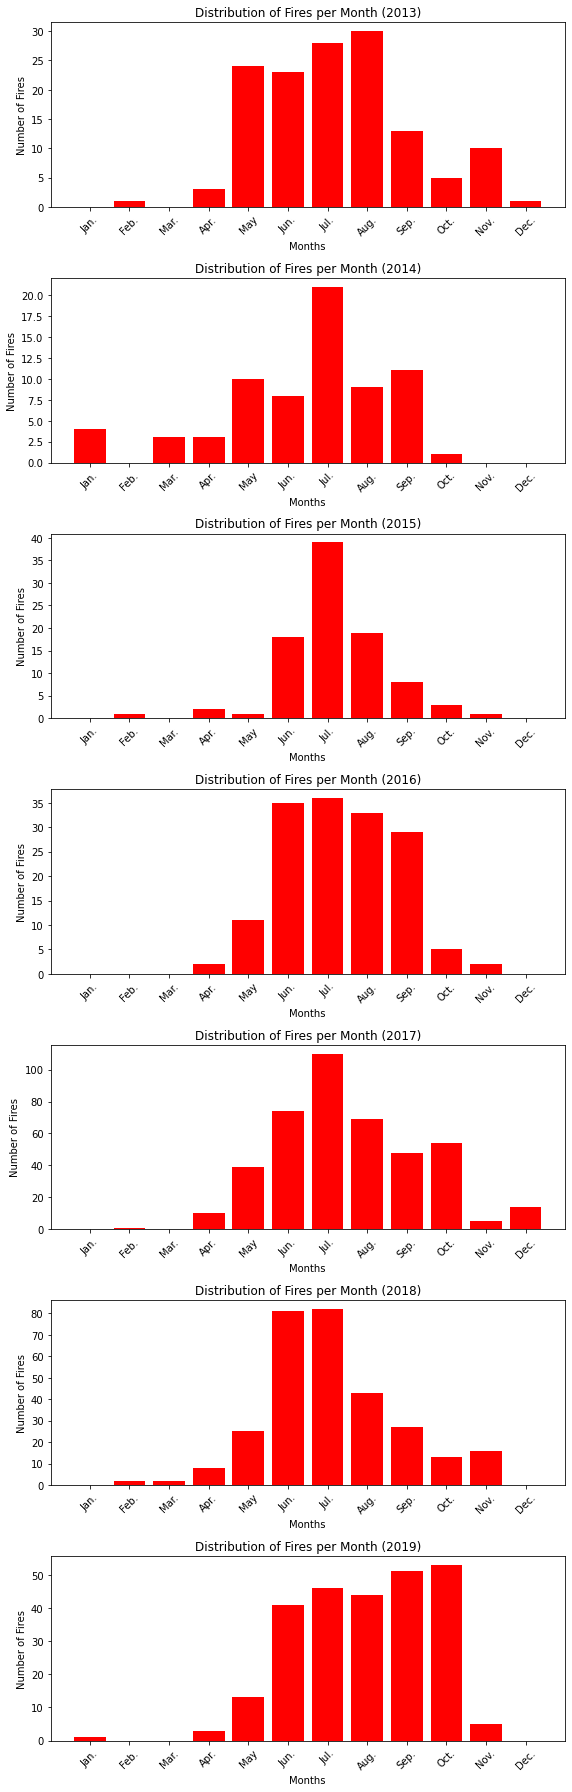

In [143]:
month_labels = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']
fig, axs = plt.subplots(7, 1, figsize=(8, 25))

for idx, ax in enumerate(axs.flatten()):
    ax.bar(fires_dct_lst[idx].keys(), height=fires_dct_lst[idx].values(), color='red')
        
    ax.set_xticks(list(range(1, 13)))
    ax.set_xticklabels(month_labels, rotation=45)
        
    ax.set_title(f'Distribution of Fires per Month ({year_lst[idx]})')
    ax.set_xlabel('Months')
    ax.set_ylabel('Number of Fires')

fig.tight_layout()
plt.show()

See shift from spring fires to fall fires. Not sure why? Could be because fall is getting warmer?

In [30]:
ca_fires_df['StartYear'].value_counts()

2017    429
2018    308
2019    259
2016    154
2013    144
2015     93
2014     72
Name: StartYear, dtype: int64

Sources:
https://towardsdatascience.com/data-101s-spatial-visualizations-and-analysis-in-python-with-folium-39730da2adf